In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import glob
import scipy.linalg as la
import seaborn as sns

In [2]:
colors = ["aqua", "red"]
sns.set_palette(sns.xkcd_palette(colors)+sns.color_palette("Set1", 9))

In [3]:
L = 8
dense = True
pert = True
if (dense): 
    fix = 'dense'
    prefix = 'data/otoc_dense'
else: 
    fix = 'sparse'
    prefix = 'data/otoc_sparse'
if (pert): 
    prefix = prefix + "_pert_"
    fix    = fix    + "_pert_"
sites = np.arange(L)
# print(prefix + "foreL" + str(L) + "v*.npy")
forenames = glob.glob(prefix + "foreL" + str(L) + "v*.npy")
backnames = glob.glob(prefix + "backL" + str(L) + "v*.npy")

In [4]:
otocsfore = []
otocsback = []
vs        = []
vsback    = []
for fname in forenames:
    otocsfore.append(np.load(fname))
    vs.append(    int(fname.replace(prefix + "foreL" + str(L) + "v", "").replace(".npy", "")))
for fname in backnames:
    otocsback.append(np.load(fname))
    vsback.append(int(fname.replace(prefix + "backL" + str(L) + "v", "").replace(".npy", "")))
vs        = np.array(vs)
otocsfore = np.array(otocsfore)
otocsback = np.array(otocsback)
args      = np.argsort(vs)
vs        = vs[args]
otocsfore = otocsfore[args]
otocsback = otocsback[np.argsort(vsback)]

1 [ 0.02974391 -0.67260965]
3 [ 0.02015314 -0.93222543]
5 [-0.10733183 -0.66283251]
6 [-0.19351191 -0.56866067]
7 [-0.2314312  -0.64566907]
8 [-0.23636922 -0.83017654]
9 [-0.24132132 -1.01860133]
10 [-0.25689817 -1.17497007]
11 [-0.28404896 -1.29343855]
12 [-0.32013603 -1.37981915]
14 [-0.40755833 -1.48660611]
16 [-0.50247863 -1.54187286]
18 [-0.5969202  -1.57071306]
20 [-0.68759443 -1.5856656 ]
22 [-0.77334826 -1.59310401]
24 [-0.85396877 -1.59637945]


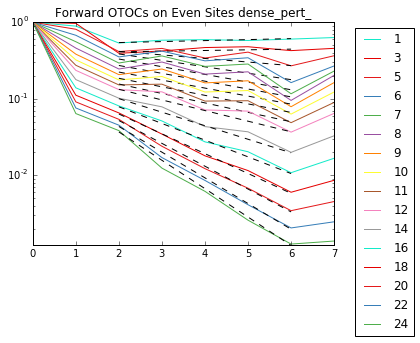

In [28]:
ax = plt.subplot(111)
gammas_fore_even = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[::], otocfore[::], label = str(vs[idx]))
    x = sites[2::2]
    y = otocfore[2::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

1 [-0.10801627 -0.07918495]
3 [-0.17592761 -0.01874018]
5 [-0.17212618 -0.11782856]
6 [-0.16916045 -0.27114746]
7 [-0.16788655 -0.45049868]
8 [-0.17869288 -0.62110946]
9 [-0.20043999 -0.77690739]
10 [-0.23060663 -0.91693875]
11 [-0.26676553 -1.04212467]
12 [-0.3068712  -1.15420353]
14 [-0.39304209 -1.34642015]
16 [-0.48112075 -1.50625405]
18 [-0.56728208 -1.64257993]
20 [-0.6498728  -1.76133673]
22 [-0.72830146 -1.86655532]
24 [-0.80248353 -1.96105194]


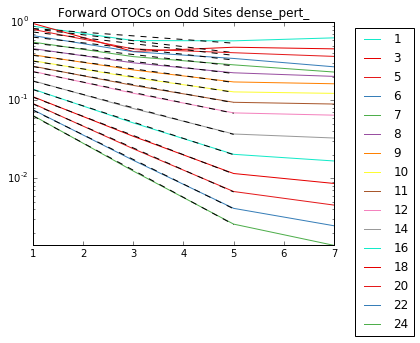

In [6]:
ax = plt.subplot(111)
gammas_fore_odd = []
for idx, otocfore in enumerate(otocsfore):
    ax.semilogy(sites[1::2], otocfore[1::2], label = str(vs[idx]))
    x = sites[1:7:2]
    y = otocfore[1:7:2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_fore_odd.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Odd Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

1 [ 0.11365344 -0.86281828]
3 [ 0.17681827 -1.31478689]
5 [ 0.25255584 -1.77569321]
6 [ 0.25804804 -1.94786088]
7 [ 0.25761694 -2.11750458]
8 [ 0.26481655 -2.34062464]
9 [ 0.28043297 -2.61332604]
10 [ 0.30373322 -2.92614064]
11 [ 0.3333211 -3.2681875]
12 [ 0.36754865 -3.62880893]
14 [ 0.44419126 -4.37234275]
16 [ 0.52516215 -5.11021864]
18 [ 0.60591894 -5.82048509]
20 [ 0.68428888 -6.49463227]
22 [ 0.7593372  -7.13066614]
24 [ 0.83075254 -7.72957226]


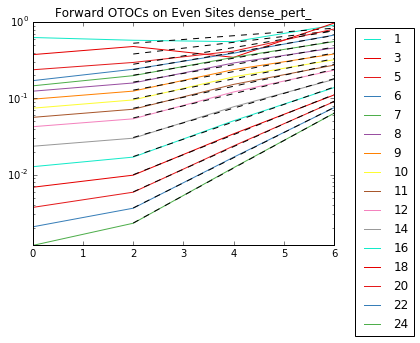

In [7]:
ax = plt.subplot(111)
gammas_back_even = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[::2], otocback[::2], label = str(vs[idx]))
    x = sites[2::2]
    y = otocback[2::2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_even.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

1 [-0.00636752 -0.48811176]
3 [ 0.03208253 -0.99542835]
5 [ 0.19203808 -1.85931229]
6 [ 0.28295053 -2.42274196]
7 [ 0.31775204 -2.76533806]
8 [ 0.34411312 -3.07727571]
9 [ 0.37525046 -3.40781444]
10 [ 0.40662543 -3.73358726]
11 [ 0.43852186 -4.05431139]
12 [ 0.47232819 -4.37552985]
14 [ 0.5466067  -5.02379202]
16 [ 0.62638622 -5.66726268]
18 [ 0.70725241 -6.29002069]
20 [ 0.78645651 -6.8833379 ]
22 [ 0.8626388  -7.44418104]
24 [ 0.93525072 -7.97264308]


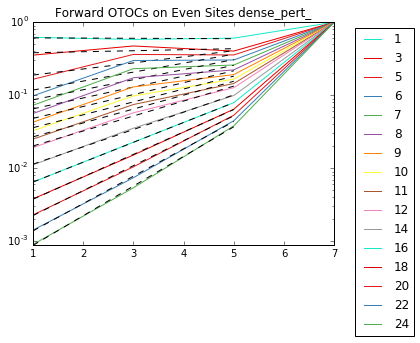

In [10]:
ax = plt.subplot(111)
gammas_back_odd = []
for idx, otocback in enumerate(otocsback):
    ax.semilogy(sites[1::2], otocback[1::2], label = str(vs[idx]))
    x = sites[1:7:2]
    y = otocback[1:7:2]
    logy = np.log(y)
    coeffs = np.polyfit(x,logy,deg=1)
    print(vs[idx], coeffs)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(x))
    ax.semilogy(x,yfit(x), 'k--')
    gammas_back_odd.append(coeffs[0] * vs[idx])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylim(0,1)
plt.title("Forward OTOCs on Even Sites " + fix)
# plt.savefig('figures/otocs_' + fix + 'foreevenL' + str(L) + '.pdf')
plt.show()

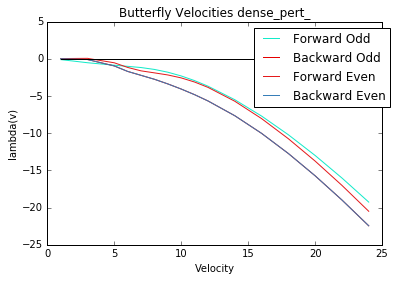

In [27]:
ax = plt.subplot(111)
ax.plot(vs, gammas_fore_odd,  label = "Forward Odd")
ax.plot(vs, np.multiply(-1,gammas_back_odd),  label = "Backward Odd")
ax.plot(vs, gammas_fore_even, label = "Forward Even")
ax.plot(vs, np.multiply(-1,gammas_back_even), label = "Backward Even")
ax.plot(vs, np.zeros(len(vs)), 'k')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(bbox_to_anchor=(.6, 1), loc=2)
plt.title("Butterfly Velocities " + fix)
plt.xlabel("Velocity")
plt.ylabel("lambda(v)")
# plt.savefig('figures/butterfly_' + fix + 'L' + str(L) + '.pdf')
plt.show()

In [26]:
np.multiply(gammas_fore_odd, -1)

array([  0.10801627,   0.52778283,   0.86063092,   1.01496268,
         1.17520585,   1.42954308,   1.80395992,   2.3060663 ,
         2.93442079,   3.68245441,   5.50258923,   7.69793205,
        10.2110774 ,  12.99745608,  16.02263203,  19.25960475])